<a href="https://colab.research.google.com/github/sabaakram539/Customer_Segmentaton_KMeans/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**
In this project, we are going to build a customer segmentation model using kmeans clustering. The dataset has been taken from the Kaggle.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
data=pd.read_csv("/content/Mall_Customers.csv")
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Data Preprocessing**

In [ ]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# Dropping the columnnID
data=data.drop(['CustomerID'],axis=1)

In [ ]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [ ]:
data1=data.drop(['Gender'],axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


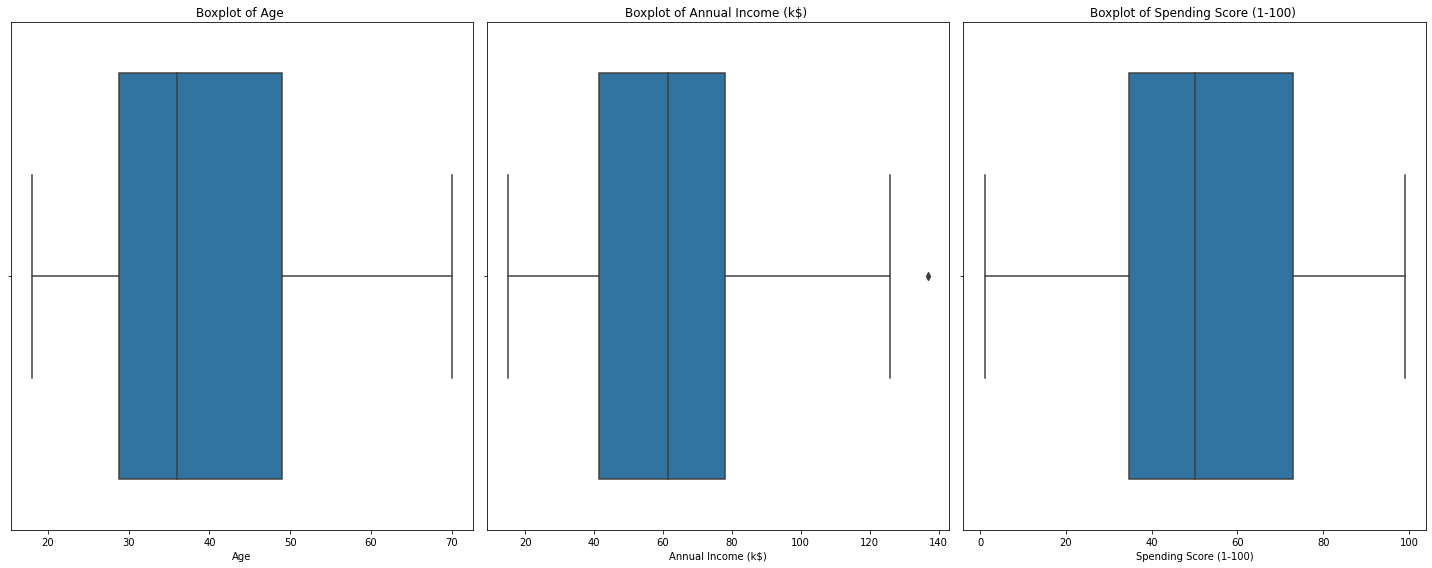

In [ ]:
# Checking the outliers
plt.figure(figsize=(20,8))
features=data1.columns
for i in range(len(features)):
  plt.subplot(1,3,i+1)
  sns.boxplot(data1[features[i]])
  plt.title(f"Boxplot of {features[i]} ")
  plt.tight_layout()

In [ ]:
data[data['Annual Income (k$)']>130]

,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,Male,32,137,18
199,Male,30,137,83


In [ ]:
# Removing the two outlier variables
data=data[data['Annual Income (k$)']<=130]

# **Exploratory Data Analysis**

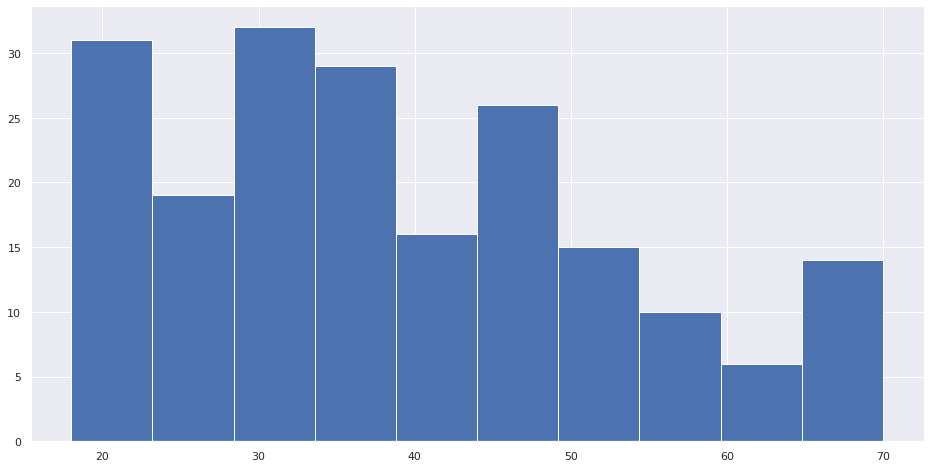

In [ ]:
plt.figure(figsize=(16,8))
plt.hist(data['Age'])
plt.show()

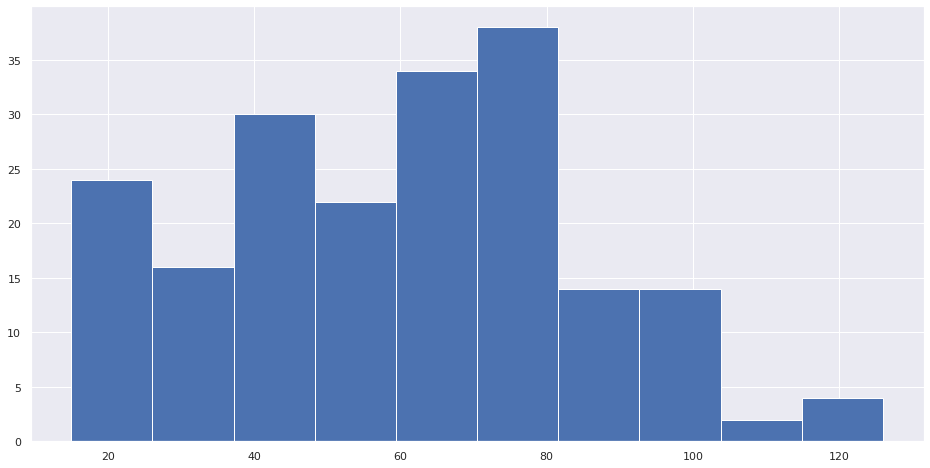

In [ ]:
plt.figure(figsize=(16,8))
plt.hist(data['Annual Income (k$)'])
plt.show()

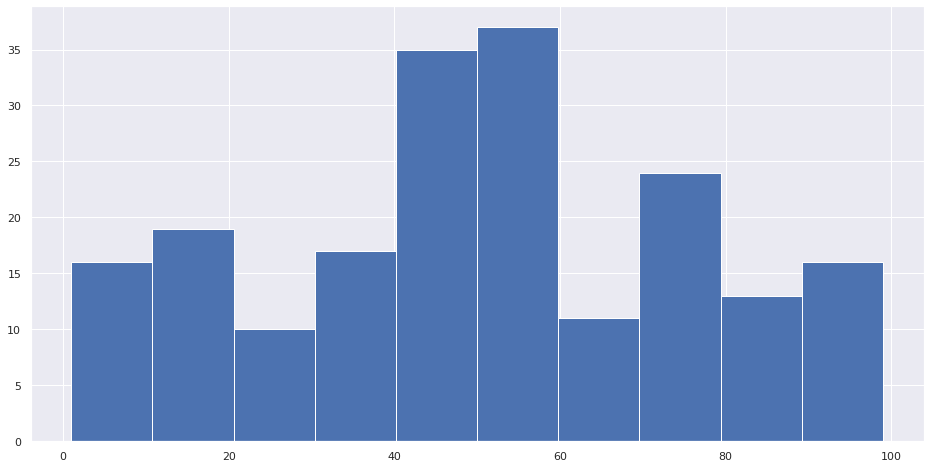

In [ ]:
plt.figure(figsize=(16,8))
plt.hist(data['Spending Score (1-100)'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


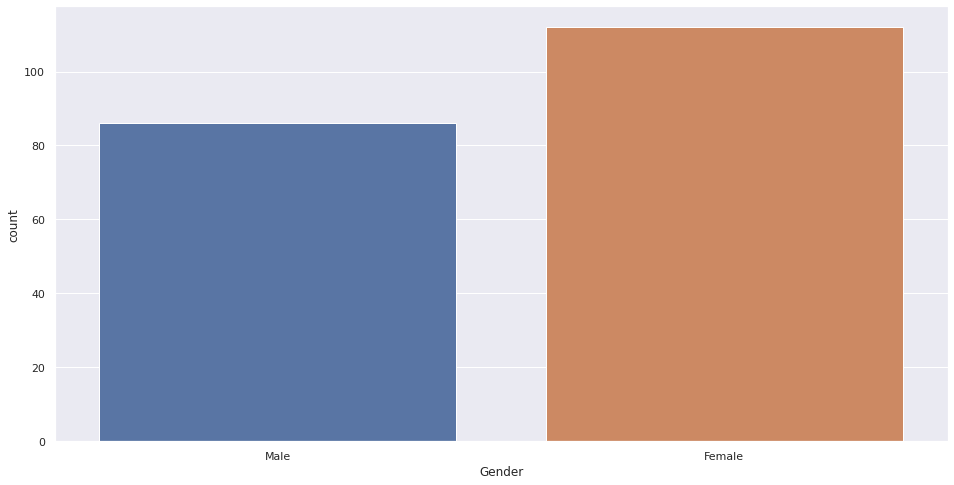

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(data['Gender'])
plt.show()

# **Model Building**

In [ ]:
x=data.iloc[:,[1,2,3]].values

In [ ]:
x

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [ ]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

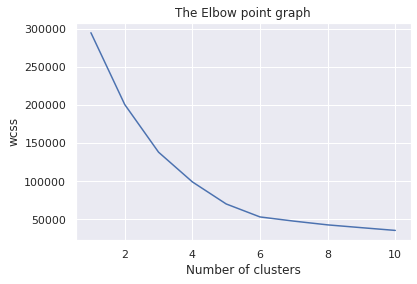

In [ ]:
# Plotting the Elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title("The Elbow point graph")
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

From the graph we observe that at point 6, we have elbow, that should be the optimum number of clusters.

# **Let's Train at the number of clusters = 6**

In [ ]:
kmeans=KMeans(n_clusters=6,init='k-means++',random_state=42)

In [ ]:
y=kmeans.fit_predict(x)

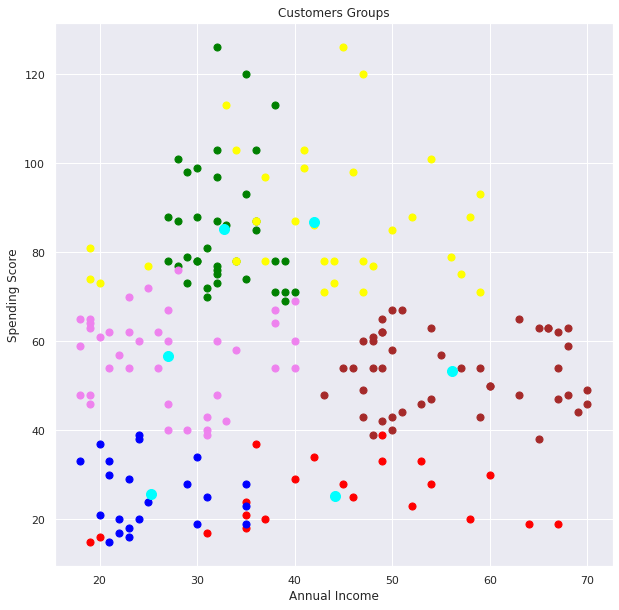

In [ ]:
plt.figure(figsize=(10,10))
# Plotting the clusters
plt.scatter(x[y==0,0],x[y==0,1],s=50,c='green',label='Cluster1')
plt.scatter(x[y==1,0],x[y==1,1],s=50,c='red',label='Cluster2')
plt.scatter(x[y==2,0],x[y==2,1],s=50,c='yellow',label='Cluster3')
plt.scatter(x[y==3,0],x[y==3,1],s=50,c='violet',label='Cluster4')
plt.scatter(x[y==4,0],x[y==4,1],s=50,c='blue',label='Cluster5')
plt.scatter(x[y==5,0],x[y==5,1],s=50,c='brown',label='Cluster6')
# Plotting the centroid
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='Centroids')
plt.title("Customers Groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()